In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Chargement des données
df = pd.read_csv("modified_test_scores.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school_type  2133 non-null   object 
 1   gender       2133 non-null   object 
 2   pretest      2133 non-null   float64
 3   posttest     2133 non-null   float64
dtypes: float64(2), object(2)
memory usage: 66.8+ KB


In [14]:
df.columns

Index(['school_type', 'gender', 'pretest', 'posttest'], dtype='object')

In [18]:
df.head(8)

,school_type,gender,pretest,posttest
0,Non-public,Female,62.0,72.0
1,Non-public,Female,66.0,79.0
2,Non-public,Male,64.0,76.0
3,Non-public,Female,61.0,77.0
4,Non-public,Male,64.0,76.0
5,Non-public,Female,66.0,74.0
6,Non-public,Male,63.0,75.0
7,Non-public,Female,63.0,72.0


In [16]:
df.tail()

,school_type,gender,pretest,posttest
2128,Public,Female,39.0,55.0
2129,Public,Female,38.0,46.0
2130,Public,Female,45.0,51.0
2131,Public,Male,46.0,53.0
2132,Public,Male,41.0,48.0


In [19]:
df.describe()

,pretest,posttest
count,2133.000000,2133.000000
mean,54.955931,67.102203
std,13.563101,13.986789
min,22.000000,32.000000
25%,44.000000,56.000000
50%,56.000000,68.000000
75%,65.000000,77.000000
max,93.000000,100.000000


# Data Preparation

In [20]:
df.duplicated().sum()

726

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

,0
school_type,0
gender,0
pretest,0
posttest,0


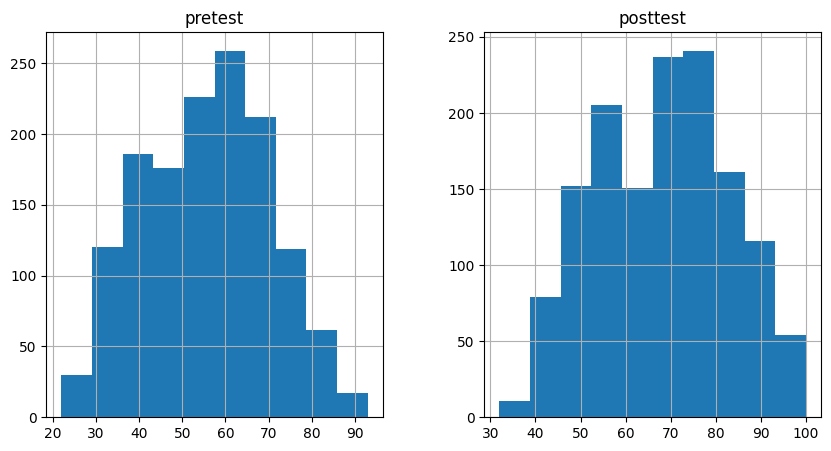

In [25]:
df.hist(figsize=(10,5))
plt.show()

In [41]:
# Encodage des variables catégoriques
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [42]:
X = df.drop(columns=['posttest'])
y = df['posttest']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Modélisation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R² Score: {r2}\n")


Linear Regression - Mean Squared Error: 23.30360250985071
Linear Regression - R² Score: 0.8975710097871886

Random Forest - Mean Squared Error: 28.849057160075752
Random Forest - R² Score: 0.8731964385227937

SVM - Mean Squared Error: 26.783500573513003
SVM - R² Score: 0.8822754157023782

KNN - Mean Squared Error: 29.82070921985816
KNN - R² Score: 0.8689256250603842



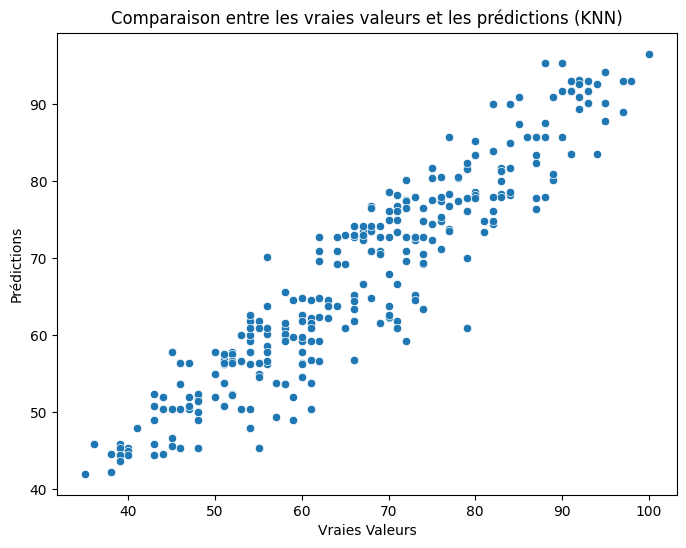

In [49]:
# Visualisation des résultats
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Vraies Valeurs")
plt.ylabel("Prédictions")
plt.title(f"Comparaison entre les vraies valeurs et les prédictions ({name})")
plt.show()

In [50]:
# Comparaison des résultats
df_results = pd.DataFrame(results, columns=["Modèle", "MSE", "R² Score"])
print("\nComparaison des performances des modèles :")
display(df_results.sort_values(by="MSE"))


Comparaison des performances des modèles :


,Modèle,MSE,R² Score
0,Linear Regression,23.303603,0.897571
2,SVM,26.783501,0.882275
1,Random Forest,28.849057,0.873196
3,KNN,29.820709,0.868926


In [51]:
# Interprétation du meilleur modèle
best_model = df_results.sort_values(by="MSE").iloc[0]
print(f"Le modèle le plus performant est {best_model['Modèle']} avec un MSE de {best_model['MSE']:.4f} et un R² Score de {best_model['R² Score']:.4f}.")
"""
Interprétation :
- Le modèle avec le plus faible MSE et le plus haut R² Score est considéré comme le plus performant.
- Un R² proche de 1 indique une bonne capacité de prédiction du modèle.
- La Random Forest est souvent efficace sur des données complexes, tandis que la régression linéaire est plus simple et interprétable.
- SVM et KNN peuvent bien fonctionner si les hyperparamètres sont bien ajustés.
"""

Le modèle le plus performant est Linear Regression avec un MSE de 23.3036 et un R² Score de 0.8976.


'\nInterprétation :\n- Le modèle avec le plus faible MSE et le plus haut R² Score est considéré comme le plus performant.\n- Un R² proche de 1 indique une bonne capacité de prédiction du modèle.\n- La Random Forest est souvent efficace sur des données complexes, tandis que la régression linéaire est plus simple et interprétable.\n- SVM et KNN peuvent bien fonctionner si les hyperparamètres sont bien ajustés.\n'